In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Metricas de los agroclimates

In [17]:
m = pd.read_csv(r'../metrics/holtwinters_agro_metrics/holtwinters_agroclimate_metrics.csv')

In [18]:
model_metric = m.groupby('variable').mean()

In [19]:
model_metric.round(decimals=3)

,parcela_id,r2,mse,rmse,aic
variable,,,,,
evapotranspiration,8.267,0.779,4.950000e-01,0.702,-451.405
relative_humidity,8.267,0.482,6.068900e+01,7.789,7606.106
solar_radiation,8.267,0.602,1.273865e+13,3569085.927,51221.810
temperature,8.267,0.850,3.251000e+00,1.803,2709.942


## Métricas de validación para los modelos de las parcelas

In [2]:
z21 = r'../../results/metrics/zafra_vis_metrics/zafra2021_vis_metrics.csv'
z22 = r'../../results/metrics/zafra_vis_metrics/zafra2022_vis_metrics.csv'
z23 = r'../../results/metrics/zafra_vis_metrics/zafra2023_vis_metrics.csv'

In [3]:
z21_df = pd.read_csv(z21)
z22_df = pd.read_csv(z22)
z23_df = pd.read_csv(z23)

In [32]:
zafras = pd.concat([z21_df, z22_df, z23_df])
zafras_mean = zafras.groupby('indice').mean()
zafras_mean['new_index'] = zafras_mean.index.str.split('_').str[0].str.upper()
zafras_mean = zafras_mean.set_index('new_index')

In [33]:
zafras_mean.round(decimals=3)

,parcela_id,a,b,c,r2,r2_adj,mse,rmse
new_index,,,,,,,,
CIRE,8.267,-0.0,0.018,-0.164,0.843,0.831,8.049,2.721
GNDVI,8.267,-0.0,0.003,0.245,0.881,0.872,0.220,0.456
MSI,8.267,0.0,-0.007,1.626,0.895,0.887,1.935,1.337
NDMI,8.267,-0.0,0.004,-0.271,0.901,0.894,0.476,0.667
NDRE1,8.267,-0.0,0.003,0.010,0.911,0.904,0.281,0.516
NDRE,8.267,-0.0,0.003,0.064,0.906,0.900,0.310,0.541
NDVI,8.267,-0.0,0.005,0.138,0.927,0.922,0.542,0.720


### Gráficas

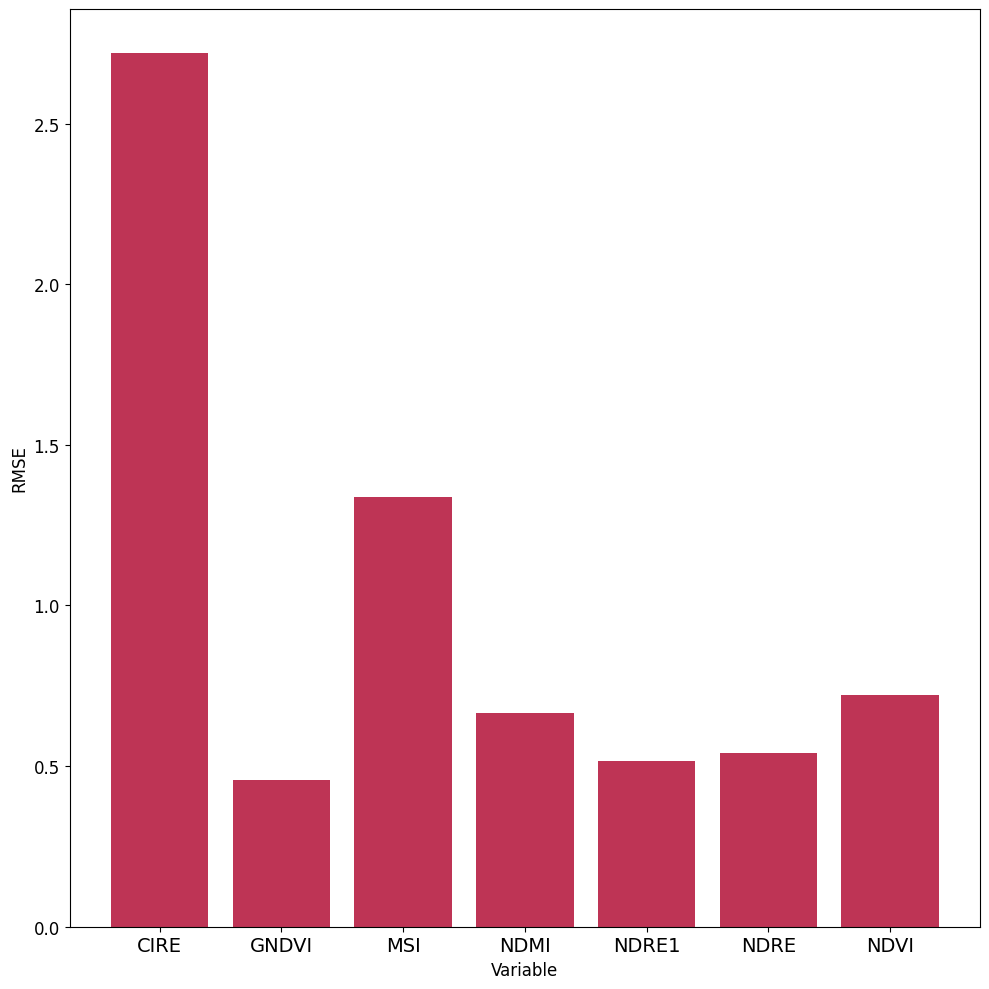

In [45]:
plt.figure(figsize=(10, 10))
plt.bar(zafras_mean.index, zafras_mean['rmse'], color='#BE3455', alpha=1)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(r'../../tesis_img/metricas/vis_rmse.pdf', dpi=100)
plt.show()